In [66]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '211102_Data'
dataname = data+'_0204_5'
filename = 'myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [67]:
SD # 데이터 불러오기

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
0,68.91,53.53,52.17,60.41,58.15,56.95,37.80,53.66,57.93,57.05,...,60.84,48.6,77.92,55.36,52.44,71.20,0.9,0,0.00,10
1,72.39,50.49,49.50,58.63,59.09,55.21,35.90,53.66,57.93,57.96,...,60.84,47.6,77.92,53.54,51.42,70.31,0.9,0,0.00,10
2,71.23,49.73,49.50,59.52,60.03,56.95,36.85,52.76,58.84,57.96,...,61.75,48.6,78.78,53.54,53.46,70.31,0.9,0,0.00,10
3,70.07,52.01,50.39,60.41,56.27,54.34,37.80,54.56,58.84,57.05,...,59.93,47.6,77.06,54.45,52.44,69.42,0.9,0,0.00,10
4,68.91,50.49,50.39,61.30,57.21,55.21,37.80,52.76,58.84,58.87,...,61.75,51.6,79.64,54.45,51.42,70.31,0.9,0,0.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552960,68.91,51.25,49.50,57.74,57.21,56.95,34.95,57.26,61.57,57.05,...,61.75,48.6,82.22,57.18,55.50,70.31,1.8,355,230.58,151
552961,70.07,55.81,53.06,58.63,60.97,53.47,34.00,56.36,62.48,57.96,...,61.75,46.6,79.64,58.09,54.48,66.75,1.8,355,230.58,151
552962,67.75,54.29,51.28,59.52,60.03,56.95,38.75,59.06,59.75,56.14,...,62.66,48.6,78.78,57.18,55.50,67.64,1.8,355,230.58,151
552963,68.91,53.53,51.28,60.41,58.15,54.34,34.95,59.06,60.66,57.05,...,61.75,46.6,79.64,55.36,51.42,68.53,1.8,355,230.58,151


In [37]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["z"].isin(list(range(37,127,3)))
mask2 = SDext["r"].isin([0.3,0.6,0.9,1.2,1.5,1.8])
SD = SDext[mask & mask2]
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
103683,67.75,54.29,52.17,60.41,62.85,56.95,38.75,55.46,57.02,57.05,...,63.57,47.6,78.78,49.90,47.34,70.31,0.9,0,130.30,37
103684,70.07,52.77,51.28,61.30,61.91,57.82,32.10,53.66,60.66,57.05,...,63.57,47.6,77.92,52.63,49.38,70.31,0.9,0,130.30,37
103685,71.23,52.01,52.17,59.52,59.09,58.69,37.80,53.66,59.75,57.05,...,63.57,47.6,81.36,51.72,50.40,70.31,0.9,0,130.30,37
103686,67.75,51.25,51.28,62.19,60.03,56.08,35.90,55.46,57.93,57.05,...,63.57,47.6,77.06,48.99,49.38,69.42,0.9,0,130.30,37
103687,68.91,53.53,53.06,63.97,61.91,55.21,37.80,51.86,57.02,57.96,...,65.39,48.6,78.78,48.08,49.38,68.53,0.9,0,130.30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449280,70.07,53.53,50.39,58.63,47.81,56.95,41.60,57.26,59.75,57.96,...,60.84,47.6,75.34,59.91,52.44,70.31,1.8,355,188.44,124
449281,70.07,55.81,51.28,58.63,48.75,57.82,36.85,58.16,59.75,54.32,...,62.66,47.6,78.78,55.36,53.46,70.31,1.8,355,188.44,124
449282,70.07,55.05,50.39,58.63,50.63,57.82,40.65,57.26,58.84,57.05,...,62.66,48.6,77.06,56.27,52.44,70.31,1.8,355,188.44,124
449283,70.07,54.29,51.28,59.52,50.63,58.69,40.65,56.36,59.75,57.96,...,61.75,46.6,78.78,55.36,51.42,67.64,1.8,355,188.44,124


In [38]:
dic = {'Sx00':'Lx10','Sx01':'Lx11','Sx02':'Lx12','Sx03':'Lx13','Sx08':'Lx14','Sx09':'Lx15','Sx0A':'Lx16','Sx0B':'Lx17',
       'Sx10':'Lx18','Sx11':'Lx19','Sx12':'Lx1A','Sx13':'Lx1B',
       'Sx07':'Lx00','Sx06':'Lx01','Sx05':'Lx02','Sx04':'Lx03','Sx0F':'Lx04','Sx0E':'Lx05','Sx0D':'Lx06','Sx0C':'Lx07',
      'Sx17':'Lx08','Sx16':'Lx09','Sx15':'Lx0A','Sx14':'Lx0B'} # 센서 데이터를 로케이션에 매칭시키는 딕셔너리

In [39]:
SD = SD.rename(columns = dic)

In [40]:
SD = SD[['Lx00','Lx01','Lx02','Lx03','Lx04','Lx05','Lx06','Lx07','Lx08','Lx09','Lx0A','Lx0B',
         'Lx10','Lx11','Lx12','Lx13','Lx14','Lx15','Lx16','Lx17','Lx18','Lx19','Lx1A','Lx1B','r','theta','theta_enc','z']]

In [41]:
SD # 딕셔너리 순으로 정렬

,Lx00,Lx01,Lx02,Lx03,Lx04,Lx05,Lx06,Lx07,Lx08,Lx09,...,Lx16,Lx17,Lx18,Lx19,Lx1A,Lx1B,r,theta,theta_enc,z
103683,55.46,38.75,56.95,62.85,56.50,30.26,36.77,49.01,70.31,47.34,...,53.5,50.21,25.96,54.84,63.57,47.6,0.9,0,130.30,37
103684,53.66,32.10,57.82,61.91,56.50,30.26,37.77,49.01,70.31,49.38,...,53.5,50.21,25.96,53.10,63.57,47.6,0.9,0,130.30,37
103685,53.66,37.80,58.69,59.09,53.83,31.94,36.77,51.86,70.31,50.40,...,53.5,51.12,30.51,51.36,63.57,47.6,0.9,0,130.30,37
103686,55.46,35.90,56.08,60.03,55.61,31.10,35.77,50.91,69.42,49.38,...,53.5,49.30,29.60,51.36,63.57,47.6,0.9,0,130.30,37
103687,51.86,37.80,55.21,61.91,55.61,30.26,36.77,50.91,68.53,49.38,...,54.4,52.03,29.60,53.97,65.39,48.6,0.9,0,130.30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449280,57.26,41.60,56.95,47.81,56.50,31.94,36.77,51.86,70.31,52.44,...,53.5,50.21,28.69,52.23,60.84,47.6,1.8,355,188.44,124
449281,58.16,36.85,57.82,48.75,55.61,28.58,31.77,51.86,70.31,53.46,...,53.5,51.12,28.69,52.23,62.66,47.6,1.8,355,188.44,124
449282,57.26,40.65,57.82,50.63,56.50,30.26,35.77,50.91,70.31,52.44,...,55.3,53.85,27.78,50.49,62.66,48.6,1.8,355,188.44,124
449283,56.36,40.65,58.69,50.63,57.39,31.94,35.77,53.76,67.64,51.42,...,53.5,51.12,28.69,53.10,61.75,46.6,1.8,355,188.44,124


In [42]:
import numpy as np
toRad = np.pi/180 
SD['cos']=np.cos(SD.theta_enc*toRad)
SD['sin']=np.sin(SD.theta_enc*toRad)
SD['theta_enc'] = SD['theta_enc'] - 180

In [43]:
SD

,Lx00,Lx01,Lx02,Lx03,Lx04,Lx05,Lx06,Lx07,Lx08,Lx09,...,Lx18,Lx19,Lx1A,Lx1B,r,theta,theta_enc,z,cos,sin
103683,55.46,38.75,56.95,62.85,56.50,30.26,36.77,49.01,70.31,47.34,...,25.96,54.84,63.57,47.6,0.9,0,-49.70,37,-0.64679,0.762668
103684,53.66,32.10,57.82,61.91,56.50,30.26,37.77,49.01,70.31,49.38,...,25.96,53.10,63.57,47.6,0.9,0,-49.70,37,-0.64679,0.762668
103685,53.66,37.80,58.69,59.09,53.83,31.94,36.77,51.86,70.31,50.40,...,30.51,51.36,63.57,47.6,0.9,0,-49.70,37,-0.64679,0.762668
103686,55.46,35.90,56.08,60.03,55.61,31.10,35.77,50.91,69.42,49.38,...,29.60,51.36,63.57,47.6,0.9,0,-49.70,37,-0.64679,0.762668
103687,51.86,37.80,55.21,61.91,55.61,30.26,36.77,50.91,68.53,49.38,...,29.60,53.97,65.39,48.6,0.9,0,-49.70,37,-0.64679,0.762668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449280,57.26,41.60,56.95,47.81,56.50,31.94,36.77,51.86,70.31,52.44,...,28.69,52.23,60.84,47.6,1.8,355,8.44,124,-0.98917,-0.146774
449281,58.16,36.85,57.82,48.75,55.61,28.58,31.77,51.86,70.31,53.46,...,28.69,52.23,62.66,47.6,1.8,355,8.44,124,-0.98917,-0.146774
449282,57.26,40.65,57.82,50.63,56.50,30.26,35.77,50.91,70.31,52.44,...,27.78,50.49,62.66,48.6,1.8,355,8.44,124,-0.98917,-0.146774
449283,56.36,40.65,58.69,50.63,57.39,31.94,35.77,53.76,67.64,51.42,...,28.69,53.10,61.75,46.6,1.8,355,8.44,124,-0.98917,-0.146774


In [44]:
SD = (SD- SD.mean())/SD.std() # 모든 데이터 정규화

In [45]:
SD.describe()

,Lx00,Lx01,Lx02,Lx03,Lx04,Lx05,Lx06,Lx07,Lx08,Lx09,...,Lx18,Lx19,Lx1A,Lx1B,r,theta,theta_enc,z,cos,sin
count,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,...,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05,3.456020e+05
mean,-3.198438e-11,-2.517560e-13,-2.368865e-13,2.278445e-12,-1.654787e-11,3.353380e-11,1.789559e-10,-3.036679e-11,-5.278324e-11,-4.684535e-11,...,8.079606e-12,2.967846e-12,-2.412812e-11,8.862090e-11,-5.878738e-12,-5.335400e-16,-5.485032e-15,2.766290e-17,1.813590e-15,-2.604178e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.251533e+00,-5.171854e+00,-8.652200e+00,-8.147050e+00,-8.846871e+00,-3.929217e+00,-4.601332e+00,-8.281495e+00,-8.450994e+00,-8.695327e+00,...,-7.353136e+00,-8.208968e+00,-8.103383e+00,-7.925454e+00,-1.341634e+00,-1.708137e+00,-1.720055e+00,-1.675249e+00,-1.407485e+00,-1.428794e+00
25%,-7.501968e-01,-6.091842e-01,-5.219459e-01,-3.540284e-01,-6.470161e-01,-8.302276e-01,-8.764825e-01,-3.237509e-01,-3.335143e-01,-3.070024e-01,...,-6.157818e-01,-4.126107e-01,-2.678628e-01,-4.773031e-01,-1.118027e+00,-8.901514e-01,-8.679470e-01,-8.665082e-01,-1.001282e+00,-9.979589e-01
50%,8.328499e-02,-1.746442e-01,2.910795e-01,1.998672e-04,1.729694e-01,5.519786e-02,-2.556742e-01,1.183459e-01,5.303242e-02,5.770739e-02,...,1.328131e-01,-4.135560e-02,1.239132e-01,1.998015e-01,-4.472078e-01,-2.404853e-02,-9.581329e-03,0.000000e+00,3.071208e-03,1.962849e-02
75%,5.000259e-01,6.944358e-01,6.975922e-01,7.086564e-01,5.829622e-01,9.406233e-01,3.651341e-01,5.604428e-01,4.395791e-01,4.224172e-01,...,5.071106e-01,7.011546e-01,5.156892e-01,5.383538e-01,4.472181e-01,8.420544e-01,8.637066e-01,8.665082e-01,1.002746e+00,9.939545e-01
max,3.833953e+00,4.822566e+00,2.730156e+00,3.188254e+00,3.452912e+00,4.482325e+00,4.710792e+00,3.655121e+00,3.145406e+00,2.975386e+00,...,3.875788e+00,3.671195e+00,2.866345e+00,2.908220e+00,1.341644e+00,1.708157e+00,1.744119e+00,1.675249e+00,1.413627e+00,1.407174e+00


In [46]:
rawSD = SD.iloc[:,:24] # 센서데이터만 자름
rawSD['Lx00_end'] = rawSD['Lx00']
rawSD['Lx01_end'] = rawSD['Lx01']
rawSD['Lx03_end'] = rawSD['Lx03']
rawSD['Lx04_end'] = rawSD['Lx04']
y = SD.iloc[:,[24,27,28,29]]

<ipython-input-46-be9ceea6e962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawSD['Lx00_end'] = rawSD['Lx00']
<ipython-input-46-be9ceea6e962>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawSD['Lx01_end'] = rawSD['Lx01']
<ipython-input-46-be9ceea6e962>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [47]:
arrSD= rawSD.to_numpy() # raw data를 넘파이 차원으로 바꿈
import numpy as np
arr2dSD = np.reshape(arrSD,(-1,2,14,1)) # 2x12 배열로 바꿈
X = arr2dSD

In [48]:
X.shape

(345602, 2, 14, 1)

In [49]:
y

,r,z,cos,sin
103683,-1.341634,-1.675249,-0.909262,1.070642
103684,-1.341634,-1.675249,-0.909262,1.070642
103685,-1.341634,-1.675249,-0.909262,1.070642
103686,-1.341634,-1.675249,-0.909262,1.070642
103687,-1.341634,-1.675249,-0.909262,1.070642
...,...,...,...,...
449280,1.341644,1.675249,-1.392209,-0.218933
449281,1.341644,1.675249,-1.392209,-0.218933
449282,1.341644,1.675249,-1.392209,-0.218933
449283,1.341644,1.675249,-1.392209,-0.218933


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [51]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  207360 ea 59 %    X_valid:  69121 ea 20 %    X_test:  69121 ea 20 %


In [52]:
# import cv2
# test = arr2dSD[123123]

# img_source = test

# height, width = img_source.shape[:2]
# img_result = cv2.resize(img_source, (10*width, 10*height), interpolation = cv2.INTER_LINEAR )

# noimage = np.zeros(img_result.shape[:2],img_result.dtype)
# avg = cv2.mean(img_result)[0]/2.0

# img_result = cv2.addWeighted(img_result, 1.0, noimage, 0, -avg)

# cv2.imshow("img",img_result)
# cv2.imwrite('myCNN_fig/img_result.jpg',img_result)
# cv2.waitKey(0)

In [53]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(64,2,activation="relu",padding = "same",input_shape =[2,14,1]),
    keras.layers.Conv2D(128,2,activation="relu",padding = "same"),
    keras.layers.Conv2D(256,2,activation="relu",padding = "same"),
    #keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),    
    keras.layers.Dense(256,activation = "relu"),
    keras.layers.Dense(64,activation = "relu"),    
    keras.layers.Dense(16,activation = "relu"),    
    keras.layers.Dense(4)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3, momentum = 0.9,nesterov = True))


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 2, 14, 64)         320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 14, 128)        32896     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 14, 256)        131328    
_________________________________________________________________
flatten_1 (Flatten)          (None, 7168)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1835264   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [55]:
import os 
root_logdir = os.path.join(os.curdir, 'mylog/'+data)

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [56]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [57]:
dataname

'211102_Data_0204_5'

In [58]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
n_epochs = 300
batch_size = 10
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
6480/6480 [==============================] - 143s 22ms/step - loss: 0.2377 - val_loss: 0.1968
Epoch 2/300
6480/6480 [==============================] - 139s 22ms/step - loss: 0.1945 - val_loss: 0.1892
Epoch 3/300
6480/6480 [==============================] - 132s 20ms/step - loss: 0.1866 - val_loss: 0.1866
Epoch 4/300
6480/6480 [==============================] - 131s 20ms/step - loss: 0.1817 - val_loss: 0.1854
Epoch 5/300
6480/6480 [==============================] - 127s 20ms/step - loss: 0.1778 - val_loss: 0.1827
Epoch 6/300
6480/6480 [==============================] - 121s 19ms/step - loss: 0.1746 - val_loss: 0.1808
Epoch 7/300
6480/6480 [==============================] - 133s 21ms/step - loss: 0.1717 - val_loss: 0.1800
Epoch 8/300
6480/6480 [==============================] - 125s 19ms/step - loss: 0.1689 - val_loss: 0.1795
Epoch 9/300
6480/6480 [==============================] - 118s 18ms/step - loss: 0.1662 - val_loss: 0.1792
Epoch 10/300
6480/6480 [======================

In [26]:
%load_ext tensorboard
%tensorboard --logdir=./mylog/211102_Data --port=20206

Reusing TensorBoard on port 20206 (pid 26400), started 4 days, 18:19:01 ago. (Use '!kill 26400' to kill it.)

In [59]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/myModel/'+dataname+'.h5')

In [60]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
valid_predictions = model.predict(X_valid)

In [61]:
valid_predictions

array([[ 0.09643726,  1.2854499 ,  0.5163813 ,  1.3442191 ],
       [-1.1164252 ,  0.9656559 , -0.0451192 ,  1.2299705 ],
       [-0.08225651,  0.9009748 ,  0.461907  , -1.3199624 ],
       ...,
       [-0.6689973 ,  0.15093866, -1.377917  , -0.50891745],
       [ 0.4643919 ,  1.1525252 ,  0.49161503,  1.2885846 ],
       [-1.2051619 , -1.1924114 , -1.0838472 , -0.912514  ]],
      dtype=float32)

In [62]:
valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_theta","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_r","valid_theta","valid_z"]
valid_predictions_df.columns = ["valid_r","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_theta","valid_z"]
#valid_predictions_df.columns = ["valid_z"]
#valid_predictions_df.columns = ["valid_theta"]
valid_predictions_df['valid_atan2'] = np.arctan2(-valid_predictions_df['valid_sin'],-valid_predictions_df['valid_cos'])
valid_predictions_df.describe()

,valid_r,valid_z,valid_cos,valid_sin,valid_atan2
count,69121.000000,69121.000000,69121.000000,69121.000000,69121.000000
mean,-0.000717,-0.039989,-0.016713,-0.017655,0.017357
std,0.689703,0.966194,0.966901,0.981906,1.809905
min,-1.637848,-2.049646,-1.606834,-1.673680,-3.141471
25%,-0.591325,-0.927055,-0.973061,-0.969169,-1.538182
50%,-0.031607,-0.001617,0.030291,-0.033319,0.057337
75%,0.599357,0.872215,0.932481,0.959205,1.628376
max,1.906846,1.902667,1.654634,1.586177,3.141539


In [63]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
#k_df.columns = ["theta_enc","z","cos","sin"]
#k_df.columns  = ["z","cos","sin"]
#k_df.columns = ["r","theta_enc","z"]
k_df.columns  = ["r","z","cos","sin"]
#k_df.columns  = ["cos","sin"]
#k_df.columns  = ["theta_enc","z"]
#k_df.columns  = ["z"]
#k_df.columns  = ["theta_enc"]
k_df['atan2'] = np.arctan2(-k_df['sin'],-k_df['cos'])
k_df.describe()

,r,z,cos,sin,atan2
count,69121.000000,69121.000000,69121.000000,69121.000000,69121.000000
mean,0.001888,0.000638,0.000456,-0.006881,0.001813
std,1.001143,1.000825,1.001283,0.998766,1.814297
min,-1.341634,-1.675249,-1.407485,-1.428794,-3.141536
25%,-1.341634,-0.866508,-1.009544,-0.997959,-1.570704
50%,0.447218,0.057767,-0.000129,-0.002148,0.006977
75%,1.341644,0.866508,1.005001,0.987999,1.570706
max,1.341644,1.675249,1.413627,1.407174,3.140073


In [64]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,4):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
69.60% r
95.67% z
97.00% cos
97.28% sin


,r,z,cos,sin,atan2,valid_r,valid_z,valid_cos,valid_sin,valid_atan2
r,1.000000,-0.001335,-0.001824,0.002588,-0.003064,0.696044,-0.000089,-0.001287,0.013076,-0.020441
z,-0.001335,1.000000,-0.000182,0.010685,-0.005986,-0.021301,0.956710,-0.000763,0.014985,0.016171
cos,-0.001824,-0.000182,1.000000,0.001208,0.001138,0.025918,-0.009366,0.969993,-0.000826,-0.001254
sin,0.002588,0.010685,0.001208,1.000000,-0.778706,-0.014801,0.009434,0.002162,0.972760,-0.749500
atan2,-0.003064,-0.005986,0.001138,-0.778706,1.000000,0.000617,0.001272,-0.010005,-0.750832,0.848349
valid_r,0.696044,-0.021301,0.025918,-0.014801,0.000617,1.000000,-0.022203,0.037987,-0.007964,-0.010568
valid_z,-0.000089,0.956710,-0.009366,0.009434,0.001272,-0.022203,1.000000,-0.009470,0.015347,0.019630
valid_cos,-0.001287,-0.000763,0.969993,0.002162,-0.010005,0.037987,-0.009470,1.000000,0.004195,-0.005939
valid_sin,0.013076,0.014985,-0.000826,0.972760,-0.750832,-0.007964,0.015347,0.004195,1.000000,-0.772300
valid_atan2,-0.020441,0.016171,-0.001254,-0.749500,0.848349,-0.010568,0.019630,-0.005939,-0.772300,1.000000


<AxesSubplot:xlabel='atan2', ylabel='valid_atan2'>

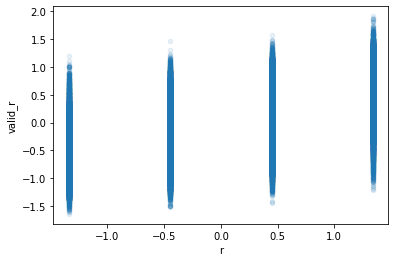

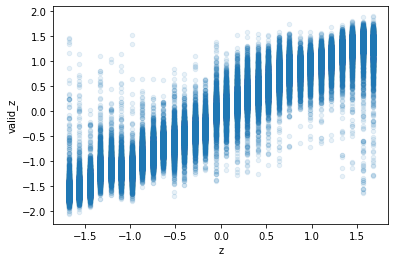

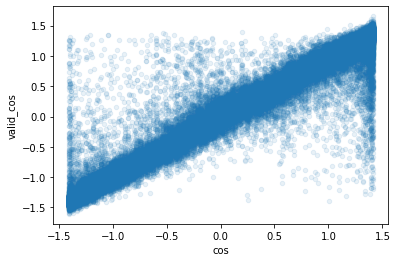

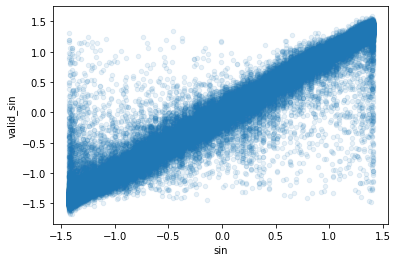

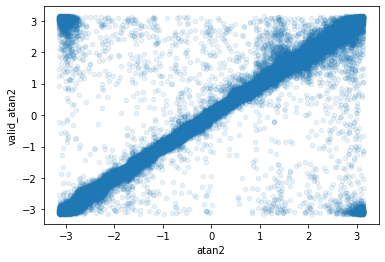

In [65]:
alpa=0.1
ValidPre.plot(kind="scatter", x= "r",y= "valid_r",alpha = 0.1)
#ValidPre.plot(kind="scatter", x= "theta_enc",y= "valid_theta",alpha = alpa)
ValidPre.plot(kind="scatter", x= "z",y= "valid_z",alpha = alpa)
ValidPre.plot(kind="scatter", x= "cos",y= "valid_cos",alpha = alpa)
ValidPre.plot(kind="scatter", x= "sin",y= "valid_sin",alpha = alpa)
#ValidPre.plot(kind="scatter", x= "valid_cos",y= "valid_sin",alpha = alpa)
#ValidPre.plot(kind="scatter", x= "cos",y= "valid_sin",alpha = alpa)
#ValidPre.plot(kind="scatter", x= "cos",y= "sin",alpha = alpa)
#ValidPre.plot(kind="scatter", x= "valid_cos",y= "sin",alpha = alpa)
#ValidPre.plot(kind="scatter", x= "theta_enc",y= "valid_atan2",alpha = alpa)
#ValidPre.plot(kind="scatter", x= "atan2",y= "theta_enc",alpha = alpa)
ValidPre.plot(kind="scatter", x= "atan2",y= "valid_atan2",alpha = alpa)
#plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/210903_70ms_3ea_sin.png')
